In this notebook, you should use the equations and general recipe covered in the lecture to perform logistic regression on part of the MNIST dataset. When in doubt, looking at the slides may help your memory ;)

In [4]:
#load packages
import numpy as np
import sklearn.model_selection
import matplotlib.pyplot as plt


In [5]:
#make helper functions

def plot_digit(X, y, idx):
    img = X[idx].reshape(28,28)
    plt.imshow(img, cmap='Greys',  interpolation='nearest')
    plt.title('true label: %d' % y[idx])
    plt.show()


In [6]:
#load data

from mlxtend.data import mnist_data
X, y = mnist_data()


#we just focus on 1's and 0's:
keep=(y==0) | (y==1)
X=X[keep,:]
y=y[keep]

y=np.expand_dims(y,1)

/var/folders/n9/2fxvhy3510z639rwyh9twwy40000gn/T/ipykernel_59067/1119189001.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title('true label: %d' % y[idx])


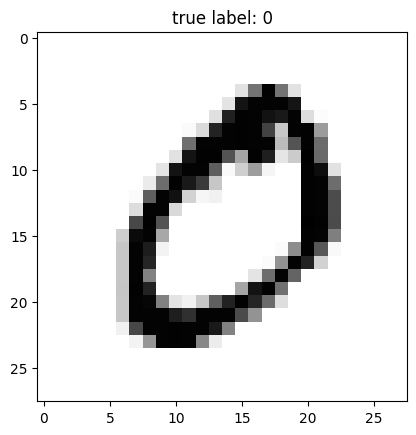

In [14]:
#inspect data

#(plot digit)
plot_digit(X, y, 0)

![Screenshot 2025-09-02 at 12.40.19.png](<attachment:Screenshot 2025-09-02 at 12.40.19.png>)
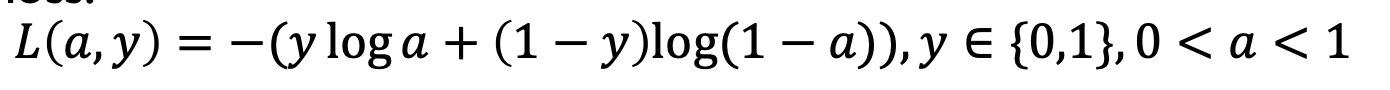

In [ ]:
# create a (binary cross entropy) loss function as discussed in the slides:
def avrLoss(y,a):           #page59 in week1's slides     Binary cross-entropy function

  loss = -(y * np.log(a) + (1 - y) * np.log(1 - a))

  return np.mean(loss)

In [16]:
#test loss function:
#(just run this cell and see what happens)

loss = avrLoss(np.array([0,1,0,1]),np.linspace(.1,.9,4))
assert np.all(loss==0.5543313122608056)

![Screenshot 2025-09-02 at 12.40.04.png](<attachment:Screenshot 2025-09-02 at 12.40.04.png>)
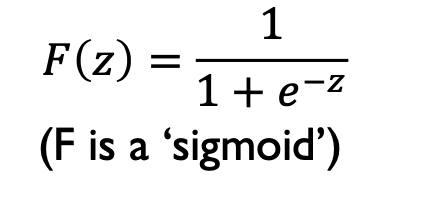

In [17]:
#create a sigmoid          page 58
def sigmoid(z):
  return 1 / (1 + np.e**(-z))

In [18]:
#check sigmoid
#(just run this cell and see what happens)

out=sigmoid(np.array(range(-5,5)))
assert np.all(np.around(out,8)==np.array([0.00669285, 0.01798621, 0.04742587, 0.11920292, 0.26894142, 0.5, 0.73105858, 0.88079708, 0.95257413, 0.98201379]))

In [19]:
#make test & train data

Xtrain,Xtest,ytrain,ytest=sklearn.model_selection.train_test_split(X,y,test_size=0.3,shuffle=True)

In [ ]:
#train

#INITIATE WEIGHTS AND BIASES (w,b)
w= 3      #random
b= 4    #random

nEpoch= 5   #random

accuracy = np.zeros(nEpoch)
trainRate = 0.5 #pick a number less than 1

for iTrain in range(nEpoch):
  #evaluate
  #CALCULATE a

  #calculate loss & accuracy
  loss =    #use the function you defined


  yhat = a > .5
  accuracy[iTrain] = np.mean(yhat == ytrain)


  #update weights       page62      the same page with 'UPDATE W AND b'
  wgrad=?   #a,ytrain,and xtrian.T,
  bgrad=?

#formulas are in page 62,and a is calculated from sigmoid ; y is ytrain;
#                           and x is the data or images you loaded



  assert(wgrad.shape == w.shape)

  #UPDATE W AND b
 #Notes: the 'some sensible step size' mentioned in page62 is just the trainRate

  if np.mod(iTrain,10)==0:
    print(iTrain,loss,accuracy[iTrain])

Y_prediction_test = sigmoid(np.matmul(Xtest,w)+b)>0.5
Y_prediction_train = sigmoid(np.matmul(Xtrain,w)+b)>0.5

print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - ytrain)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - ytest)) * 100))

In [ ]:
#see what the network does:

img = w.reshape(28,28)
h=plt.imshow(img, cmap='Greys',  interpolation='nearest')
plt.colorbar(h)
plt.show()

In [ ]:
#commpare with scikit-learn:

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(Xtrain, ytrain)

clf.predict(X)
print('Train accuracy: ',clf.score(Xtrain, ytrain))
print('Test accuracy: ',clf.score(Xtest, ytest))

img = (clf.coef_).reshape(28,28)
plt.imshow(img, cmap='Greys',  interpolation='nearest')
plt.show()

NameError: ignored